# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2023.09.13.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [1]:
MY_UNIQNAME = 'sudhagar'  # replace this with your uniqname

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [2]:
#Question 1 Part 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices_dataset = pd.read_json('https://github.com/umsi-data-science/data/raw/main/invoices.json')
items_dataset = pd.read_json('https://github.com/umsi-data-science/data/raw/main/items.json')
purchases_dataset = pd.read_json('https://github.com/umsi-data-science/data/raw/main/purchases.json')

### Cleaning the Datasets

In [3]:
#Cleaning Invoices Dataset

#Removing '.0' at the end of the Customer ID as it is supposed to be a 5 digit integer
invoices_dataset['CustomerID_cleaned'] = invoices_dataset['CustomerID'].astype(str).str.replace('\.0', '')

#Removing the rows which have the invoice number starting with 'c' as we only need to analyse the shipped orders
invoices_dataset.drop(invoices_dataset[invoices_dataset['InvoiceNo'].str.lower().str.startswith('c')].index, inplace=True)

invoices_dataset

C:\Users\hp\AppData\Local\Temp/ipykernel_18808/843481944.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  invoices_dataset['CustomerID_cleaned'] = invoices_dataset['CustomerID'].astype(str).str.replace('\.0', '')


,InvoiceNo,InvoiceDate,CustomerID,Country,CustomerID_cleaned
0,536365,12/1/10 8:26,17850.0,United Kingdom,17850
1,536366,12/1/10 8:28,17850.0,United Kingdom,17850
2,536367,12/1/10 8:34,13047.0,United Kingdom,13047
3,536368,12/1/10 8:34,13047.0,United Kingdom,13047
4,536369,12/1/10 8:35,13047.0,United Kingdom,13047
...,...,...,...,...,...
25938,581583,12/9/11 12:23,13777.0,United Kingdom,13777
25939,581584,12/9/11 12:25,13777.0,United Kingdom,13777
25940,581585,12/9/11 12:31,15804.0,United Kingdom,15804
25941,581586,12/9/11 12:49,13113.0,United Kingdom,13113


In [4]:
#Cleaning Items Dataset

#Removing alphabets which are at the start and end of the Stock Code as it is supposed to be a 5 digit integer
items_dataset['StockCode_cleaned'] = items_dataset['StockCode'].str.extract(r'(\d{5})')

items_dataset

,StockCode,Description,UnitPrice,StockCode_cleaned
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123
1,71053,WHITE METAL LANTERN,3.39,71053
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,84406
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029
...,...,...,...,...
4065,85179a,GREEN BITTY LIGHT CHAIN,2.46,85179
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,23617
4067,90214U,"LETTER ""U"" BLING KEY RING",0.29,90214
4068,47591b,SCOTTIES CHILDRENS APRON,4.13,47591


In [6]:
#Cleaning Purchases Dataset

#Removing alphabets which are at the start and end of the Stock Code as it is supposed to be a 5 digit integer
purchases_dataset['StockCode_cleaned'] = purchases_dataset['StockCodeSC'].str.extract(r'(\d{5})')

#Removing the rows which have the invoice number starting with 'c' as we only need to analyse the shipped orders
purchases_dataset.drop(purchases_dataset[purchases_dataset['InvoiceNo'].str.lower().str.startswith('c')].index, inplace=True)

#Removing the quantities that are negative since that is not possible in a retail dataset
purchases_dataset.drop(purchases_dataset[purchases_dataset['Quantity'] < 0].index, inplace=True)

purchases_dataset

,InvoiceNo,StockCodeSC,Quantity,StockCode_cleaned
0,536365,SC85123A,6,85123
1,536365,SC71053,6,71053
2,536365,SC84406B,8,84406
3,536365,SC84029G,6,84029
4,536365,SC84029E,6,84029
...,...,...,...,...
541904,581587,SC22613,12,22613
541905,581587,SC22899,6,22899
541906,581587,SC23254,4,23254
541907,581587,SC23255,4,23255


In [7]:
#Question 1 Part 2

print("Total Number of Invoices -", invoices_dataset['InvoiceNo'].nunique())

Total Number of Invoices - 22064


In [8]:
#Question 1 Part 3

print("Total Number of Unique Customers -", invoices_dataset['CustomerID_cleaned'].nunique())

Total Number of Unique Customers - 4340


In [9]:
#Question 1 Part 4

print("Total Number of Unique Items -", items_dataset['StockCode_cleaned'].nunique())

Total Number of Unique Items - 3386


In [10]:
#Question 1 Part 5

#Checking invoices dataset for null values

null_columns = invoices_dataset.columns[invoices_dataset.isnull().any()]

if null_columns.empty:
    print("There are no columns with null values.")
else:
    print("Columns with null values:")
    for column in null_columns:
        print(column)

Columns with null values:
CustomerID


In [11]:
#Checking items dataset for null values

null_columns = items_dataset.columns[items_dataset.isnull().any()]

if null_columns.empty:
    print("There are no columns with null values.")
else:
    print("Columns with null values:")
    for column in null_columns:
        print(column)

Columns with null values:
Description
StockCode_cleaned


In [60]:
#Checking purchases dataset for null values

null_columns = purchases_dataset.columns[purchases_dataset.isnull().any()]

if null_columns.empty:
    print("There are no columns with null values.")
else:
    print("Columns with null values:")
    for column in null_columns:
        print(column)

Columns with null values:
StockCode_cleaned


### <span style="color:red"> Question 1 Part 6 Explanation - </span>

* To join the three datasets with different sizes—invoices, items, and purchased datasets—we can use appropriate types of database-style joins, primarily relying on the common columns between them.

    * Joining Invoices and Purchased Datasets: We can start by joining the invoices and purchased datasets using the 'invoice number' column from the invoices dataset and the 'invoice number' column from the purchased dataset. This will allow us to associate each purchase with the corresponding invoice, which typically forms the core of sales data.

    * Joining Items Dataset: After the first join, we can further enrich the merged dataset by joining it with the items dataset. We would use the 'stock code' column, which is common between the merged dataset and the items dataset. This join will add information about the items purchased in each transaction.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [61]:
#Question 2 Part 1

customer_invoice_counts = invoices_dataset.groupby('CustomerID_cleaned').size().reset_index(name='Total_Invoices')
sorted_customer_invoice_counts = customer_invoice_counts.sort_values(by='Total_Invoices', ascending=False)
top_10_customers = sorted_customer_invoice_counts.head(10)

print("Top 10 customers by total invoices:")
print(top_10_customers)


Top 10 customers by total invoices:
     CustomerID_cleaned  Total_Invoices
4339                nan            3540
326               12748             211
1880              14911             202
4011              17841             124
562               13089              97
1662              14606              95
2177              15311              91
481               12971              86
1690              14646              74
2703              16029              63


In [13]:
#Question 2 Part 2

question2_part2 = invoices_dataset.merge(purchases_dataset, on='InvoiceNo')

grouping = question2_part2.groupby('CustomerID_cleaned')['Quantity'].sum().reset_index()
grouping_sorted = grouping.sort_values(by='Quantity', ascending=False)

print("Top 10 customers by total quantity:")
grouping_sorted.head(10)

Top 10 customers by total quantity:


,CustomerID_cleaned,Quantity
4339,nan,490860
1690,14646,197491
1880,14911,81009
3009,16446,80997
55,12415,77670
0,12346,74215
3729,17450,69993
3772,17511,67423
4202,18102,64124
997,13694,63312


### <span style="color:red"> Question 2 Part 3 Explanation - </span>

* It is not true for all cases that customers having the highest number of invoices have the highest overall quantity. But this is true for some cases listed below -
* For example - The person with Customer ID 14911 has both 'Total_Invoices' and 'Quantity' in the top 10 customer's list. 

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [14]:
#Question 3 Part 1

items_dataset['UnitPrice'].mean()

6.905277886977887

In [15]:
items_dataset['UnitPrice'].describe()

count     4070.000000
mean         6.905278
std        173.775142
min          0.000000
25%          1.250000
50%          2.510000
75%          4.250000
max      11062.060000
Name: UnitPrice, dtype: float64

In [16]:
#Question 3 Part 2

items_under_25 = items_dataset[items_dataset['UnitPrice'] < 25]

percentage_under_25 = (len(items_under_25) / len(items_dataset)) * 100

print(f"Percentage of items under $25: {percentage_under_25:.2f}%")

Percentage of items under $25: 98.75%


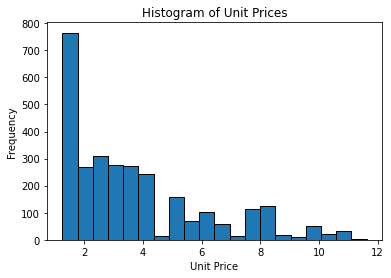

In [17]:
#Question 3 Part 3

unit_prices = items_dataset['UnitPrice']

quantile_1 = items_dataset['UnitPrice'].quantile(0.25)
quantile_2 = items_dataset['UnitPrice'].quantile(0.95)
plt.hist(unit_prices, bins=20, range=(quantile_1, quantile_2), edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Prices')
plt.show()


### <span style="color:red"> Question 3 Part 3 Explanation - </span>
* The minimum value for the histogram taken is the 25th quantile of Unit Prices.
* The maximum value taken for the histogram is the 95th quantile of Unit Prices.
* We have taken the 25th & the 95th quantile of Unit Prices as minimum and maximum value respectively as these are the best edge values to depict most of the genuine values of Unit Price, removing the extreme outliers and irregular values on both sides of the spectrum of Unit Prices.


### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [59]:
# Question 4 Part 1

question4_part1 = items_dataset.merge(purchases_dataset, on='StockCode_cleaned')

grouping_2 = question4_part1.groupby('Description')['Quantity'].sum().reset_index()
grouping_2_sorted = grouping_2.sort_values(by='Quantity', ascending=False)

print("Top 10 most ordered items:")
grouping_2_sorted.head(10)

Top 10 most ordered items:


,Description,Quantity
1694,JUMBO BAG STRAWBERRY,159646
3562,WHITE HANGING HEART T-LIGHT HOLDER,83912
2216,"PAPER CRAFT , LITTLE BIRDIE",80995
1681,JUMBO BAG BAROQUE BLACK WHITE,79823
1691,JUMBO BAG RED RETROSPOT,79823
1906,MEDIUM CERAMIC TOP STORAGE JAR,78033
3178,SMALL POPCORN HOLDER,56921
3648,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3730,ebay,47883
3732,mailout,44954


In [30]:
# Question 4 Part 2

combined_df = question4_part1.merge(invoices_dataset, on='InvoiceNo')

#Calculating revenue for each row
combined_df['Revenue'] = combined_df['UnitPrice']*combined_df['Quantity'] * 1.25

combined_df['Revenue'] = combined_df['Revenue'].round(2)

grouping_3 = combined_df.groupby('InvoiceNo')['Revenue'].sum().reset_index()
grouping_3_sorted = grouping_3.sort_values(by='Revenue', ascending=False).head(5)

grouping_3_sorted

,InvoiceNo,Revenue
19089,578060,23919862.00
17764,575328,17942641.50
5180,547966,14949388.75
1931,540699,14949388.75
17250,574277,12437891.44


In [32]:
# Quesrion 4 Part 3

combined_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE    12
           RED WOOLLY HOTTIE WHITE HEART.         12
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
A563187    PADS TO MATCH ALL CUSHIONS              1
           POSTAGE                                 1
           SAMPLES                                 1
           SUNJAR LED NIGHT NIGHT LIGHT            1
           ebay                                    3
Name: Quantity, Length: 627146, dtype: int64

In [58]:
combined_df.head(2)

,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,InvoiceDate,CustomerID,Country,CustomerID_cleaned,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123,536365,SC85123A,6,12/1/10 8:26,17850.0,United Kingdom,17850,19.12
1,85123a,WHITE HANGING HEART T-LIGHT HOLDER,6.77,85123,536365,SC85123A,6,12/1/10 8:26,17850.0,United Kingdom,17850,50.78


### <span style="color:red"> Question 4 Part 3 Explanation - </span>

* Yes, the top 5 invoices contain some products which are in the top 10 lists of most ordered products

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [34]:
# Question 5

customer_revenue = combined_df.groupby('CustomerID_cleaned')['Revenue'].sum().reset_index()
customer_revenue['Segment'] = pd.cut(
    customer_revenue['Revenue'],
    bins=[0, 1750, 8250, float('inf')],
    labels=['Low Value', 'Medium Value', 'High Value']
)

customer_revenue_join = customer_revenue.merge(combined_df, on=['Revenue', 'CustomerID_cleaned'])

pivot_table = pd.pivot_table(customer_revenue_join, values='Quantity', index='StockCode_cleaned', 
                             columns='Segment', aggfunc='mean', dropna=False)

# Question 5 Part 1
segment_counts = customer_revenue['Segment'].value_counts()
print("Number of customers in each segment:")
print(segment_counts)

pivot_table['Low Value']=pivot_table['Low Value'].round(2)
pivot_table['Medium Value']=pivot_table['Medium Value'].round(2)
pivot_table['High Value']=pivot_table['High Value'].round(2)

# Question 5 Part 2
print("Pivot table displaying average order quantities:")
pivot_table.head()


Number of customers in each segment:
Low Value       2279
Medium Value    1217
High Value       844
Name: Segment, dtype: int64
Pivot table displaying average order quantities:


Segment,Low Value,Medium Value,High Value
StockCode_cleaned,,,
15036,330.0,NaN,NaN
15039,20.0,NaN,NaN
16016,100.0,NaN,NaN
16225,192.0,NaN,NaN
20713,100.0,NaN,NaN


In [37]:
pivot_table.idxmax()

Segment
Low Value       84568
Medium Value    22197
High Value      23166
dtype: object

In [52]:
pivot_table.loc[pivot_table['Low Value'].idxmax()]

Segment
Low Value       1440.0
Medium Value       NaN
High Value         NaN
Name: 84568, dtype: float64

In [46]:
pivot_table.loc[pivot_table['Medium Value'].idxmax()]

Segment
Low Value          NaN
Medium Value    4300.0
High Value         NaN
Name: 22197, dtype: float64

In [47]:
pivot_table.loc[pivot_table['High Value'].idxmax()]

Segment
Low Value           NaN
Medium Value        NaN
High Value      74215.0
Name: 23166, dtype: float64

In [57]:
customer_revenue_join.head(5)

,CustomerID_cleaned,Revenue,Segment,StockCode,Description,UnitPrice,StockCode_cleaned,InvoiceNo,StockCodeSC,Quantity,InvoiceDate,CustomerID,Country
0,12346,96479.50,High Value,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,23166,541431,SC23166,74215,1/18/11 10:01,12346.0,United Kingdom
1,13017,297.00,Low Value,22112,CHOCOLATE HOT WATER BOTTLE,4.95,22112,580331,SC22112,48,12/2/11 15:53,13017.0,United Kingdom
2,13099,306.00,Low Value,21422,PORCELAIN ROSE SMALL,0.85,21422,565217,SC21422,288,9/1/11 17:40,13099.0,United Kingdom
3,13106,228.82,Low Value,22456,NATURAL SLATE CHALKBOARD LARGE,10.17,22456,561811,SC22456,18,7/29/11 15:12,13106.0,United Kingdom
4,13120,31.50,Low Value,82482,WOODEN PICTURE FRAME WHITE FINISH,2.10,82482,550198,SC82482,12,4/15/11 10:19,13120.0,United Kingdom


### <span style="color:red"> Question 5 Part 3 Explantion - </span>

* No, all the items having highest average order quantity are not same across all segments since there is a huge gap in constructing the segments corresponding to Low Value, Medium Value & High Value.

### <span style="color:red"> Question 5 Part 4 Explanation - </span>
* For example we can take three products, each from one segment
    * Low Value - Chocolate Hot Water Bottle (48 qty)
    * Medium Value - Small Popcorn Holder (4300 qty)
    * High Value - Medium Ceramic Top Storage Jar (74215 qty)<p>

* What we can notice is that the products in the high value segment have vast difference in quantity over the medium and lower value segment products which shows the discfrepancy in the buying trends of the customers.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas